# Importing libraries

In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
!pip install scikit-learn spacy

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [4]:
!pip install contractions

In [5]:
!pip install gensim

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
#!pip install --upgrade numpy
#!pip install --upgrade spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [6]:
!pip install scikit-learn

In [7]:
!pip install matplotlib

In [8]:
import pandas as pd
import numpy as np

# Train & testsplit
from sklearn.model_selection import train_test_split

# DTM (document-term-matrix)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Performance Evaluation
from sklearn.metrics import classification_report

# Saving model
import pickle

# Graphs
import matplotlib.pyplot as plt

# contractions
import contractions

# natural language toolkit
import nltk

# stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# splitting the document into words (tokenization)
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# lemmatization (elimination of the plural / derivatives of the word)
import spacy
nlp = spacy.load('en_core_web_sm')

# regex
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Reading data

In [9]:
from google.colab import files

In [10]:
uploaded = files.upload()

Saving set_date_examen1.csv to set_date_examen1 (1).csv


In [11]:
import pandas as pd
reviews = pd.read_csv("set_date_examen1.csv")
print(reviews.shape)
reviews.head()

(11344, 3)


,rest_id,text,rating
0,L772e6l2Yd0DJEyCBxBNng,Everytime I'm in town I hit this place for cur...,5.0
1,L772e6l2Yd0DJEyCBxBNng,I go to State Street Brats every time I am in ...,4.0
2,L772e6l2Yd0DJEyCBxBNng,Two of us visited on a Thursday lunch.\n\nThe ...,3.0
3,L772e6l2Yd0DJEyCBxBNng,State street brats has a dress code that openl...,1.0
4,L772e6l2Yd0DJEyCBxBNng,Sad to have a place like this on campus in Mad...,1.0


In [12]:
reviews.dtypes

,0
rest_id,object
text,object
rating,float64


## Text Normalization

In [13]:
review_test = reviews['text'].iloc[0]
review_test

"Everytime I'm in town I hit this place for curds, beer and brats. I spent a whole Sunday watching football here and had a blast. Crowded times are a little annoying, but it is a college place. Love the mustard selections too. Curds are a must!"

In [14]:
# Convert text to lower case
processed_text = review_test.lower()
processed_text

"everytime i'm in town i hit this place for curds, beer and brats. i spent a whole sunday watching football here and had a blast. crowded times are a little annoying, but it is a college place. love the mustard selections too. curds are a must!"

In [15]:
# Contractions
contractions.fix(processed_text)

'everytime i am in town i hit this place for curds, beer and brats. i spent a whole sunday watching football here and had a blast. crowded times are a little annoying, but it is a college place. love the mustard selections too. curds are a must!'

In [16]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
# Split the review (document) in words
processed_text_2 = nltk.word_tokenize(processed_text)
processed_text_2[0:5]

['everytime', 'i', "'m", 'in', 'town']

In [18]:
# Create a list of common words
common_words = stopwords.words('english')
print(len(common_words))
common_words[0:10]

198


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [19]:
# Remove common words from text_processed_2
print(len(processed_text_2))
processed_text_3 = [element for element in processed_text_2 if element not in common_words]
print(len(processed_text_3))
processed_text_3[0:5]

54
32


['everytime', "'m", 'town', 'hit', 'place']

In [20]:
# Turn the list back into a sentence
processed_text_4 = " ".join(processed_text_3)
processed_text_4

"everytime 'm town hit place curds , beer brats . spent whole sunday watching football blast . crowded times little annoying , college place . love mustard selections . curds must !"

In [21]:
# Reduce each word to its lemma
processed_text_5= " ".join([word.lemma_ for word in nlp(processed_text_4)])
processed_text_5

"everytime ' m town hit place curd , beer brat . spend whole sunday watch football blast . crowd time little annoying , college place . love mustard selection . curd must !"

In [22]:
reviews.head()

,rest_id,text,rating
0,L772e6l2Yd0DJEyCBxBNng,Everytime I'm in town I hit this place for cur...,5.0
1,L772e6l2Yd0DJEyCBxBNng,I go to State Street Brats every time I am in ...,4.0
2,L772e6l2Yd0DJEyCBxBNng,Two of us visited on a Thursday lunch.\n\nThe ...,3.0
3,L772e6l2Yd0DJEyCBxBNng,State street brats has a dress code that openl...,1.0
4,L772e6l2Yd0DJEyCBxBNng,Sad to have a place like this on campus in Mad...,1.0


In [23]:
def preprocess_text(document):
    # Convert text to lower case
    document = document.lower()
    # Replace short forms (contractions)
    document = contractions.fix(document)
    # Regex
    # ^ = NOT
    document = re.sub(r'[^\w\s]', ' ', document)
    document = re.sub(r'[^a-z ]', '', document)
    # Split the document into words (tokenization)
    document = word_tokenize(document)
    # Remove common words (stopwords)
    common_words = stopwords.words('english')
    document = [element for element in document if element not in common_words]
    # Convert from word list to string
    document = " ".join(document)
    # Reduce each word to its lemma (Lemmatization)
    document = " ".join([word.lemma_ for word in nlp(document)])

    return document

In [24]:
print('Initial Review:', review_test)
print('')
print('Processed Review:', preprocess_text(review_test))

Initial Review: Everytime I'm in town I hit this place for curds, beer and brats. I spent a whole Sunday watching football here and had a blast. Crowded times are a little annoying, but it is a college place. Love the mustard selections too. Curds are a must!

Processed Review: everytime town hit place curd beer brat spend whole sunday watch football blast crowd time little annoying college place love mustard selection curd must


In [25]:
reviews.head(2)

,rest_id,text,rating
0,L772e6l2Yd0DJEyCBxBNng,Everytime I'm in town I hit this place for cur...,5.0
1,L772e6l2Yd0DJEyCBxBNng,I go to State Street Brats every time I am in ...,4.0


In [26]:
reviews['text_prep'] = reviews['text'].apply(preprocess_text)
reviews.head(2)

,rest_id,text,rating,text_prep
0,L772e6l2Yd0DJEyCBxBNng,Everytime I'm in town I hit this place for cur...,5.0,everytime town hit place curd beer brat spend ...
1,L772e6l2Yd0DJEyCBxBNng,I go to State Street Brats every time I am in ...,4.0,go state street brat every time wisconsin time...


In [27]:
reviews.to_csv('processed_review.csv', index=False)

In [28]:
# Remove ratings with score 3
reviews = reviews[reviews['rating']!=3].reset_index(drop=True)
print(reviews.shape)
reviews.head(2)

(9937, 4)


,rest_id,text,rating,text_prep
0,L772e6l2Yd0DJEyCBxBNng,Everytime I'm in town I hit this place for cur...,5.0,everytime town hit place curd beer brat spend ...
1,L772e6l2Yd0DJEyCBxBNng,I go to State Street Brats every time I am in ...,4.0,go state street brat every time wisconsin time...


In [29]:
reviews['rating'].value_counts()

,count
rating,
5.0,4618
4.0,3138
1.0,1156
2.0,1025


In [30]:
# Add 'positive' column
reviews['positive'] = np.where(reviews['rating']<3, 0, 1)
reviews['positive'].value_counts()

,count
positive,
1,7756
0,2181


In [31]:
sentences = []
labels = []

sentences = reviews['text_prep']
labels = reviews['positive']

In [32]:
reviews.head()

,rest_id,text,rating,text_prep,positive
0,L772e6l2Yd0DJEyCBxBNng,Everytime I'm in town I hit this place for cur...,5.0,everytime town hit place curd beer brat spend ...,1
1,L772e6l2Yd0DJEyCBxBNng,I go to State Street Brats every time I am in ...,4.0,go state street brat every time wisconsin time...,1
2,L772e6l2Yd0DJEyCBxBNng,State street brats has a dress code that openl...,1.0,state street brat dress code openly discrimina...,0
3,L772e6l2Yd0DJEyCBxBNng,Sad to have a place like this on campus in Mad...,1.0,sad place like campus madison racist protocol ...,0
4,L772e6l2Yd0DJEyCBxBNng,Place was busy when we got there but the servi...,5.0,place busy get service good cashier suggest gr...,1


# DTM

In [33]:
# Build a vocabulary of the 6000 most common words
vec = CountVectorizer(max_features=6000)

# Create DTM
dtm1 = vec.fit_transform(reviews['text_prep'])

# Convert into dataframe
dtm = pd.DataFrame(dtm1.toarray(),
                   columns=vec.get_feature_names_out())

In [34]:
dtm.head(5)

,aa,aback,ability,able,abound,absence,absolute,absolutely,absorb,absurd,...,zealand,zen,zero,zesty,zi,ziti,zone,zoo,zoodle,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    dtm,
    reviews['positive'],
    train_size=0.8,
    random_state=42
    )

In [36]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

7949 1988 7949 1988


# DTM + Random Forest

In [37]:
#object initialization
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=10, max_depth=5,
                                       n_estimators=100, oob_score=True, class_weight='balanced')

In [38]:
#training
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=10,
                       oob_score=True, random_state=42)

In [39]:
#generate predictions
y_test_preds = classifier_rf.predict(X_test)

In [40]:
y_test_preds

array([0, 1, 1, ..., 1, 1, 1])

In [41]:
print('Classification Report on test set\n',
      classification_report(y_test, y_test_preds)
      )

Classification Report on test set
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       437
           1       0.95      0.93      0.94      1551

    accuracy                           0.91      1988
   macro avg       0.86      0.88      0.87      1988
weighted avg       0.91      0.91      0.91      1988



## Grid Search

In [42]:
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [43]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [50,100,200],
    'n_estimators': [30,50,100]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1_macro")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [50, 100, 200],
                         'n_estimators': [30, 50, 100]},
             scoring='f1_macro', verbose=1)

In [44]:
grid_search.best_score_

0.8305426441476909

In [45]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=50, n_jobs=-1, random_state=42)

In [46]:
#Saving model
pickle.dump(rf_best, open("random_forest_dtm_model.pkl", "wb"))

In [47]:
#Generate predictions
y_test_preds_grid = rf_best.predict(X_test)

In [48]:
print('Classification Report on test set\n',
      classification_report(y_test, y_test_preds_grid)
      )

Classification Report on test set
               precision    recall  f1-score   support

           0       0.73      0.87      0.79       437
           1       0.96      0.91      0.93      1551

    accuracy                           0.90      1988
   macro avg       0.84      0.89      0.86      1988
weighted avg       0.91      0.90      0.90      1988



## Interpretation of Classification report DTM + Random Forest + Grid Search

-In terms of precision, the model performs better at identifying positive reviews (96%) compared to negative ones. This means that out of all the reviews predicted as positive by the model, 96% were actually positive. The performance is slightly lower for the negative class, where 73% of the reviews predicted as negative were truly negative.

-Regarding the recall score, the results are also better for the positive reviews, although the difference is small. This shows that out of all the truly positive reviews, 90% were correctly identified by the model.

-Additionally, the F1-score confirms strong performance, as the model makes few mistakes in identifying positive reviews, taking into account the high values for both precision and recall. However, the F1-score is also fairly good for the negative class, if we take into consideration that this class is underrepresented in the dataset.

-The model's overall accuracy is 90%, which means that 90% of the reviews were correctly classified.

## Fast Text



In [67]:
corpus = reviews['text_prep'].astype(str)
corpus = corpus.apply(word_tokenize).to_list()

In [68]:
from gensim.models import FastText

In [69]:
ft_model = FastText(min_count=3, vector_size=60, window=10)

# Built the vocabulary from the corpus
ft_model.build_vocab(corpus)

ft_model.train(corpus,
               total_examples=len(corpus),
               epochs=5)

(2298384, 2616370)

In [70]:
repr_review = []

for doc in corpus:
    valid_words = [word for word in doc if word in ft_model.wv]
    if valid_words:
        medie = np.mean(ft_model.wv[valid_words], axis=0)
    else:
        medie = np.zeros(ft_model.vector_size)
    repr_review.append(medie)

# Turn the list into a matrix (array 2D)
repr_review = np.vstack(repr_review)

In [71]:
repr_review.shape

(9937, 60)

## Fast Text - Train/test split

In [72]:
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(
    repr_review,
    reviews['positive'],
    train_size=0.8,
    random_state=42)

In [73]:
X_train_ft.shape

(7949, 60)

In [74]:
X_test_ft.shape

(1988, 60)

## Fast Text + Random Forest

In [75]:
# Object initialization
classifier_ft = RandomForestClassifier(random_state=42, n_jobs=10, max_depth=5,
                                       n_estimators=100, oob_score=True, class_weight='balanced')

In [76]:
classifier_ft.fit(X_train_ft, y_train_ft)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=10,
                       oob_score=True, random_state=42)

In [77]:
# Predictions
ypred_ft = classifier_ft.predict(X_test_ft)

In [78]:
print(" Classification Report on test set: FastText + Random Forest")
print(classification_report(y_test_ft, ypred_ft))

 Classification Report on test set: FastText + Random Forest
              precision    recall  f1-score   support

           0       0.62      0.81      0.70       437
           1       0.94      0.86      0.90      1551

    accuracy                           0.85      1988
   macro avg       0.78      0.83      0.80      1988
weighted avg       0.87      0.85      0.85      1988



## Grid Search

In [79]:
rf_ft= RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [50,100,200],
    'n_estimators': [30,50,100]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train_ft, y_train_ft)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [50, 100, 200],
                         'n_estimators': [30, 50, 100]},
             scoring='accuracy', verbose=1)

In [80]:
best_model_ft = grid_search.best_estimator_

In [81]:
#Saving model
pickle.dump(rf_best, open("random_forest_fasttext_model.pkl", "wb"))

In [82]:
#Generate predictions
y_pred_ft_best = best_model_ft.predict(X_test_ft)

In [83]:
print("Classification Report - Random Forest + FastText + GridSearch")
print(classification_report(y_test_ft, y_pred_ft_best))

Classification Report - Random Forest + FastText + GridSearch
              precision    recall  f1-score   support

           0       0.61      0.82      0.70       437
           1       0.94      0.85      0.90      1551

    accuracy                           0.85      1988
   macro avg       0.78      0.84      0.80      1988
weighted avg       0.87      0.85      0.85      1988



## Interpretation of Classification report - Random Forest + FastText + GridSearch
  - In terms of precision, the model performs better at identifying positive reviews (95%) compared to negative ones. This means that out of all the reviews predicted as positive by the model, 95% were actually positive.
  - Regarding the recall score, the results are also slightly better for the positive reviews, although the difference is small. This indicates that 85% of all truly positive reviews were correctly identified by the model.
  - Furthermore, the F1-score confirms that the model handles positive reviews more effectively, given the high values for both measures.
  - The model's overall accuracy is 85%, which means that 85% of the reviews were correctly classified.

### Model comparison
- Comparing the two approaches based on evaluation metrics, the model based on DTM achieves better performance.
- The DTM-based model achieved very good scores, especially on the positive class, with a precision of 96% and a recall of 91%. The model balances both classes well because it also performs strongly on the negative class (79%), even though it is underrepresentated. The overall accuracy of the model is very good, indicating that 90% of the reviews were correctly classified.
- The FastText model obtained relatively lower scores compared to the one based on DTM. Although it achieved a good recall on the negative class (83%), it obtains a poorer accuracy (61%), which means that it identifies many negative reviews, but it makes more false positive errors. As with the previous model, the performance on the positive class is high, but slightly weaker compared to this one. Also, the overall accuracy of the model is slightly lower in comparison with the previous model (85%).
- In conclusion, the DTM-based model is the most performant in this case, achieving higher scores across all evaluation metrics, regardless of the review type. Although FastText has a better understanding of word meaning and semantic relationships, it did not outperform DTM in this scenario — partly due to the strong class imbalance. In this case, the individual word representation was sufficient, likely because of the more direct and expressive language found in many of the reviews.

# Retele neuronale

In [ ]:
#!pip install --upgrade numpy

In [ ]:
!pip install jax

In [ ]:
import json
import tensorflow as tf
import json,urllib.request

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
texts = reviews['text_prep'].astype(str).tolist()
labels = reviews['positive'].tolist()

In [ ]:
# parameters for padding, tokenizer and train test split
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

## Train/test split

In [ ]:
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(
    sentences,
    labels,
    train_size=0.8,
    random_state=42
)

# Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

# Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
249/249 - 5s - 18ms/step - accuracy: 0.7777 - loss: 0.5250 - val_accuracy: 0.7807 - val_loss: 0.5020
Epoch 2/30
249/249 - 1s - 4ms/step - accuracy: 0.8113 - loss: 0.4183 - val_accuracy: 0.8747 - val_loss: 0.3045
Epoch 3/30
249/249 - 1s - 5ms/step - accuracy: 0.9054 - loss: 0.2429 - val_accuracy: 0.9044 - val_loss: 0.2128
Epoch 4/30
249/249 - 1s - 6ms/step - accuracy: 0.9365 - loss: 0.1687 - val_accuracy: 0.9351 - val_loss: 0.1804
Epoch 5/30
249/249 - 2s - 8ms/step - accuracy: 0.9538 - loss: 0.1326 - val_accuracy: 0.9411 - val_loss: 0.1645
Epoch 6/30
249/249 - 1s - 6ms/step - accuracy: 0.9631 - loss: 0.1088 - val_accuracy: 0.9452 - val_loss: 0.1506
Epoch 7/30
249/249 - 1s - 4ms/step - accuracy: 0.9691 - loss: 0.0932 - val_accuracy: 0.9351 - val_loss: 0.1674
Epoch 8/30
249/249 - 1s - 5ms/step - accuracy: 0.9733 - loss: 0.0812 - val_accuracy: 0.9492 - val_loss: 0.1473
Epoch 9/30
249/249 - 1s - 6ms/step - accuracy: 0.9774 - loss: 0.0719 - val_accuracy: 0.9457 - val_loss: 0.1506


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481,301 (1.84 MB)

 Trainable params: 160,433 (626.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,868 (1.22 MB)

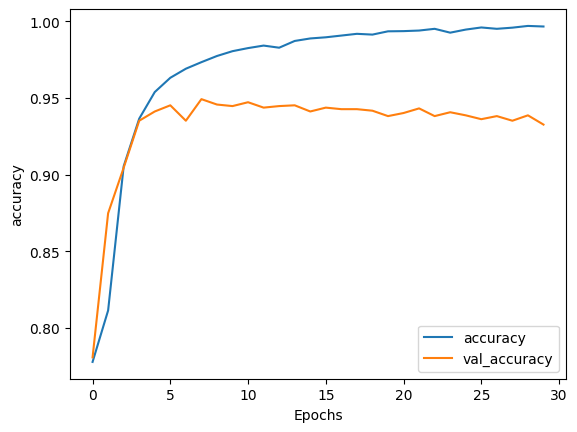

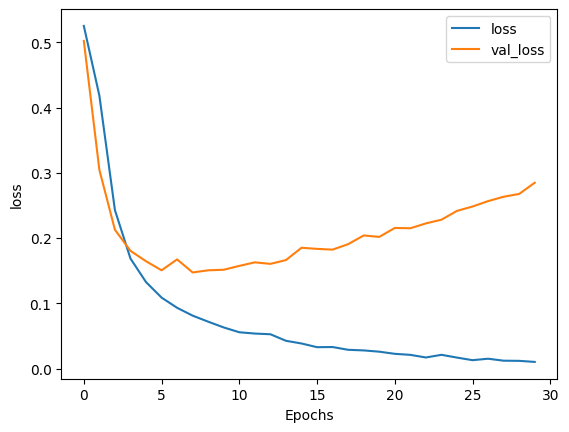

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

come friend tell new spot say live hype great service great cocktail nice get custom cocktail make timely manner ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
state street brat dress code openly discriminate marginalized community madison bring light social medium outraged patron begin write review express anger feeling rating drop brat respond remove rating review facebook page establishment good address concern community racist establishment one give business
0


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


# Saving the model

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
from sklearn.metrics import classification_report

# Generate class probabilities
pred_probs = model.predict(testing_padded)

# Convert into binary classes (0 or 1)
preds = (pred_probs > 0.5).astype(int)

# Evaluation - classification_report
print("Classification Report - Neural Network:\n")
print(classification_report(testing_labels, preds))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Classification Report - Neural Network:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       437
           1       0.96      0.95      0.96      1551

    accuracy                           0.93      1988
   macro avg       0.90      0.91      0.90      1988
weighted avg       0.93      0.93      0.93      1988



## Classification report NN
- Just like the previous models, this one also performs better on the positive class. However, the metrics are also very good for the negative class. The model’s overall accuracy shows that 93% of the reviews were correctly classified.
- Of all the reviews predicted as positive, 96% were correctly identified by the model, while in the case of the negative class, 84% were correctly identified.
- The recall score shows that the model is more effective at detecting the dominant class — 95% of the truly positive reviews were correctly identified.
-Thus, the neural network model is capable of detecting negative reviews, despite the fact that they in the minority, and the model shows high confidence in its positive predictions.